# Task for Today  

***

## Legendary Pokémon Classification  

Given *data about various Pokémon*, let's try to predict if a given Pokémon is **legendary** or not.  
  
We will use a TensorFlow ANN to make our predictions.

# Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('../input/pokemon/Pokemon.csv')

In [3]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
data_raw = data.copy()

# Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
data.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
data = data.drop(['#', 'Name', 'Type 2'], axis=1)

In [8]:
data['Legendary'] = data['Legendary'].astype(np.int)

In [9]:
data

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,0
1,Grass,405,60,62,63,80,80,60,1,0
2,Grass,525,80,82,83,100,100,80,1,0
3,Grass,625,80,100,123,122,120,80,1,0
4,Fire,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
795,Rock,600,50,100,150,100,150,50,6,1
796,Rock,700,50,160,110,160,110,110,6,1
797,Psychic,600,80,110,60,150,130,70,6,1
798,Psychic,680,80,160,60,170,130,80,6,1


# EDA

In [10]:
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [11]:
numeric_columns = data.drop('Type 1', axis=1).columns

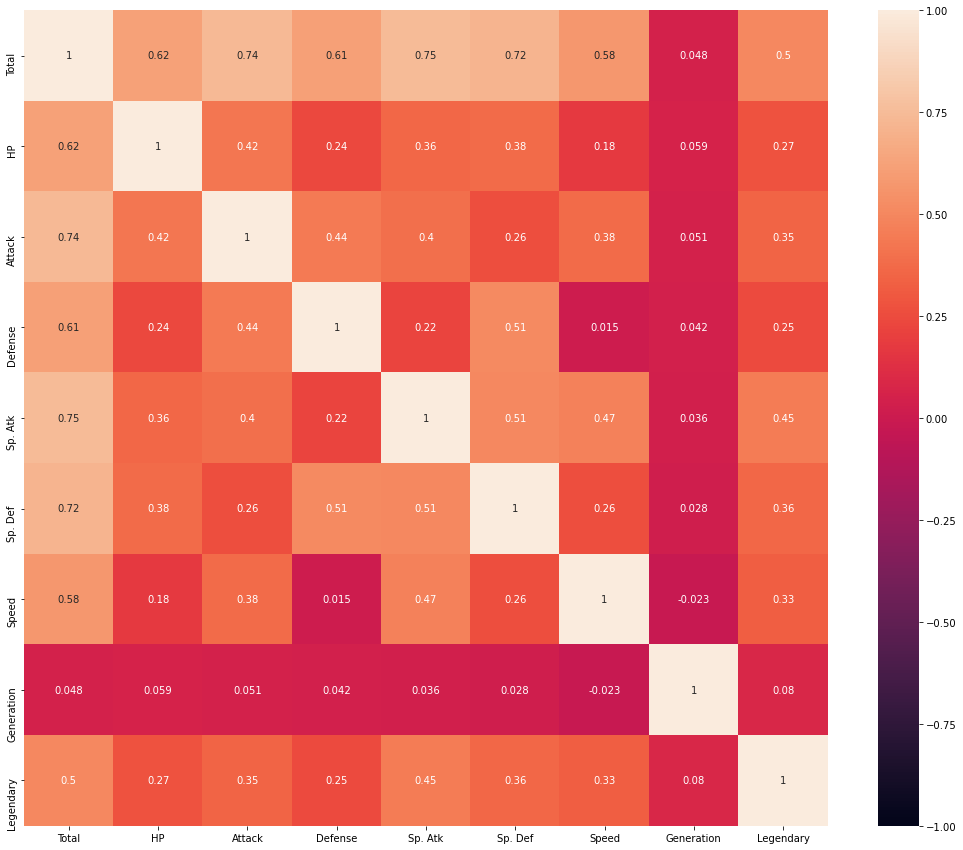

In [12]:
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

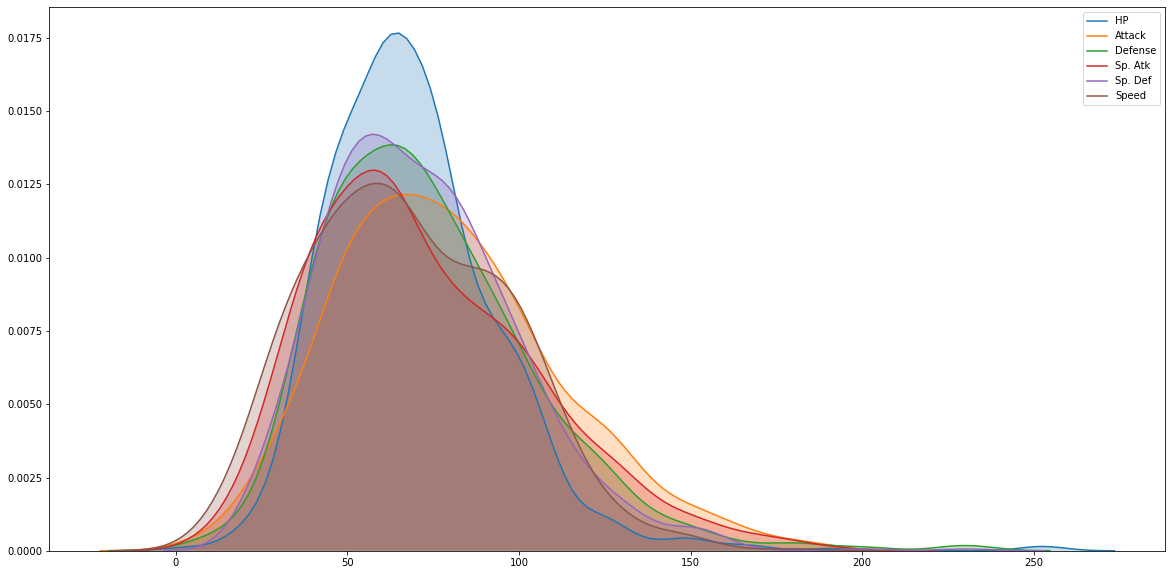

In [13]:
plt.figure(figsize=(20, 10))
for column in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    sns.kdeplot(data[column], shade=True)
plt.show()

# Preprocessing

In [14]:
data.dtypes

Type 1        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary      int64
dtype: object

## Encoding

In [15]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [16]:
data = onehot_encode(data, 'Type 1', 't')

In [17]:
data

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,t_Bug,...,t_Ghost,t_Grass,t_Ground,t_Ice,t_Normal,t_Poison,t_Psychic,t_Rock,t_Steel,t_Water
0,318,45,49,49,65,65,45,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,1,0,...,0,0,0,0,0,0,0,1,0,0
796,700,50,160,110,160,110,110,6,1,0,...,0,0,0,0,0,0,0,1,0,0
797,600,80,110,60,150,130,70,6,1,0,...,0,0,0,0,0,0,1,0,0,0
798,680,80,160,60,170,130,80,6,1,0,...,0,0,0,0,0,0,1,0,0,0


## Splitting and Scaling

In [18]:
y = data['Legendary']
X = data.drop('Legendary', axis=1)

In [19]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Training

In [21]:
X.shape

(800, 26)

In [22]:
inputs = tf.keras.Input(shape=(26,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 32
epochs = 20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

# Results

In [23]:
fig_loss = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'x': "Epoch", 'y':"Loss"},
    title="Loss Over Time"
)

fig_loss.show()

In [24]:
np.argmin(history.history['val_loss'])

18

In [25]:
fig_auc = px.line(
    history.history,
    y=['auc', 'val_auc'],
    labels={'x': "Epoch", 'y':"AUC"},
    title="AUC Over Time"
)

fig_auc.show()

In [26]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9500 - auc: 0.9730


[0.10595642030239105, 0.949999988079071, 0.9730370044708252]

# Post-Training Analysis

In [27]:
predictions = np.hstack((model.predict(X_test) >= 0.5).astype(np.int)) != y_test
predictions

696     True
667    False
63     False
533    False
66     False
       ...  
220    False
450    False
380    False
132    False
375    False
Name: Legendary, Length: 240, dtype: bool

In [28]:
mislabeled_indices = y_test[predictions].index

In [29]:
data_raw.loc[mislabeled_indices, :]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
696,635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False
306,282,GardevoirMega Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,3,False
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
275,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
715,648,MeloettaAria Forme,Normal,Psychic,600,100,77,77,128,128,90,5,False
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
527,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
196,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False


In [30]:
X.shape

(800, 26)

In [31]:
pca = PCA(n_components=2)
data_reduced = pd.DataFrame(pca.fit_transform(data), columns=["PC1", "PC2"])

In [32]:
data_reduced

,PC1,PC2
0,-125.860535,-5.210496
1,-32.131498,-5.769779
2,97.225136,-5.394538
3,206.065317,18.625769
4,-135.910526,-21.594064
...,...,...
795,179.904137,67.081536
796,290.419171,-20.944313
797,181.100238,-27.664645
798,269.322935,-37.485121


In [33]:
legendary_indices = data.query("Legendary == 1").index

mislabeled_legendary_indices = np.intersect1d(mislabeled_indices, legendary_indices)

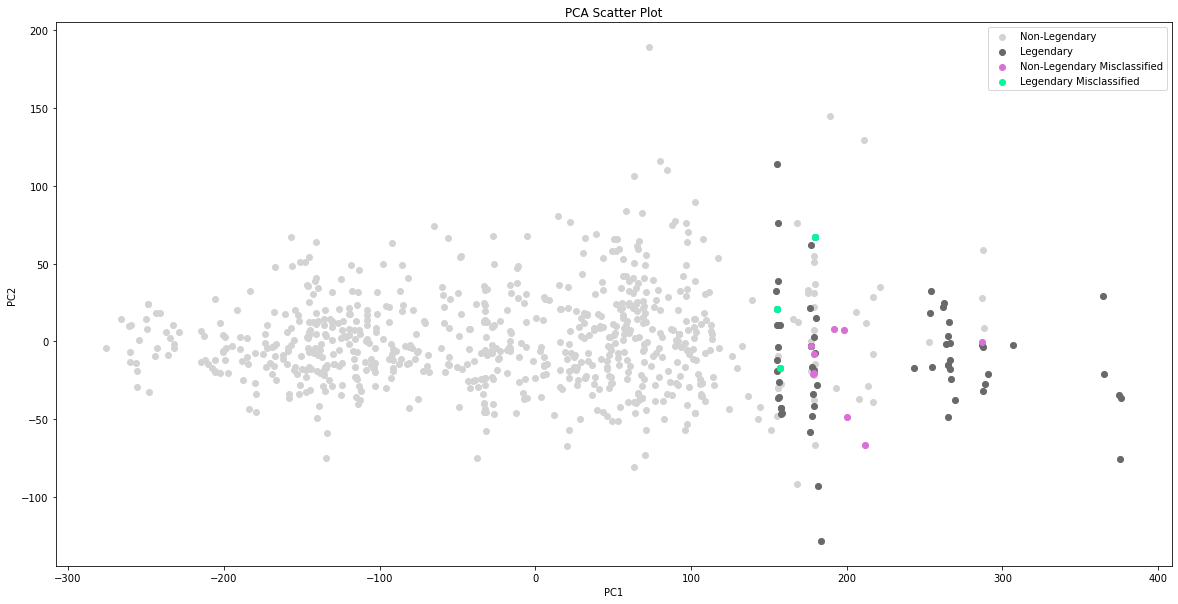

In [34]:
plt.figure(figsize=(20, 10))

plt.scatter(data_reduced['PC1'], data_reduced['PC2'], c='lightgray')
plt.scatter(data_reduced.loc[legendary_indices, 'PC1'], data_reduced.loc[legendary_indices, 'PC2'], c='dimgray')
plt.scatter(data_reduced.loc[mislabeled_indices, 'PC1'], data_reduced.loc[mislabeled_indices, 'PC2'], c='orchid')
plt.scatter(data_reduced.loc[mislabeled_legendary_indices, 'PC1'], data_reduced.loc[mislabeled_legendary_indices, 'PC2'], c='mediumspringgreen')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(['Non-Legendary', 'Legendary', 'Non-Legendary Misclassified', 'Legendary Misclassified'])
plt.title("PCA Scatter Plot")
plt.show()